"""
Analytic solutions for the problem of heating a hollow circular cylinder (Noda, 2002).
Noda, N. (2002), Thermal stresses, CRC Press LLC.

Heat conduction causes mechanical expansion/shrinkage.
Constant 100 degC and 0 degC are imposed on the inner and outer surfaces, respectively.
Steady-state analytical solutions for temperature (radial) and stress (radial and tangential direction).
"""


In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib.pylab as plt

UsageError: Line magic function `%matplotlib.pylab` not found.


In [2]:

def radial_temperature(x_array, Ta, a, Tb, b):
    """ Analytic solution for temperature

    Parameters
    -------------------
    
        x_array : numpy array
            x values of the domain (radial direction)
        Ta : float
            Inner temperature
         a : float
            Inner radius
        Tb : float
            Outer temperature
         b : float
            Outer radius

    Returns 
    -----------------
        temperature : numpy array
            temperature solution 
            
    Notes
    -----------------
        None 
    
    """
    
    print("Computing temperature ")
    
    temperature = Ta*np.log(b/x_array)/np.log(b/a)+273.15  # in Kelvin
    
    print("Computing temperature - done")
    return temperature


def radial_stress(x_array, Ta, a, Tb, b, E, alpha):
    """ Analytic solution for radial stress 

    Parameters
    -------------------

        x_array : numpy array
            x values of the domain (radial direction)
        Ta : float
            Inner temperature
         a : float
            Inner radius
        Tb : float
            Outer temperature
         b : float
            Outer radius
         E : float 
            Young's Modulus 
        alpha : float 
            linear thermal expansion coefficient

    Returns 
    -----------------
        stress1 : numpy array
            radial stress solution 

    Notes
    -----------------
        None 

    """
    print("\nComputing Radial Stress")
    stress1 = 0.5*alpha*E*(Tb-Ta)*(-(np.log(x_array/a)/np.log(b/a))+(1.0-(a/x_array)*(a/x_array))*b*b/(b*b-a*a))
    print("Computing Radial Stress - done")

    return stress1

def tangential_stress(x_array, Ta, a, Tb, b, E, alpha):
    """ Analytic solution for vertical strain 

    Parameters
    -------------------
    
        x_array : numpy array
            x values of the domain (radial direction)
        Ta : float
            Inner temperature
         a : float
            Inner radius
        Tb : float
            Outer temperature
         b : float
            Outer radius
         E : float 
            Young's Modulus 
        alpha : float 
            linear thermal expansion coefficient

    Returns 
    -----------------
        stress2 : numpy array
            tangential stress solution 

    Notes
    -----------------
        None 

    """
    print("\nComputing Tangential Stress")
    stress2 = 0.5*alpha*E*(Tb-Ta)*(-((1.0+np.log(x_array/a))/np.log(b/a))+(1.0+(a/x_array)*(a/x_array))*b*b/(b*b-a*a))
    print("Computing Tangential Stress - done")

    return stress2

In [5]:
print("Computing analytical solutions for TM heating hollow cylinder")
    
Ta = 100 # inner temperature (degC)
a = 0.03 # inner radius (meter)
b = 0.15 # outer radius (meter)
Tb = 0 # outer temperature (degC)
alpha = 5e-5 # linear thermal expansion coefficient (1/degC)
E = 20e9 # Young's Modulus (Pascals)

# Model Parameters 
L = b - a #domain length (m) (distance from inner to outer radius)
dx = 0.001  # spacing of grid points (m)
Nx = np.ceil(L / dx).astype(int)  # number of grid points
x_array = np.linspace(dx+a, L+a, Nx) # grid of points to compute solution

print("\nParameters")
print("--------------------------------------")
print(f"Inner temperature\t\t{Ta} [degC]")
print(f"Outer temperature\t\t{Tb} [degC]")
print(f"Inner radius\t\t{a} [m]")
print(f"Outer radius\t\t{b} [m]")
print("")
temperature = radial_temperature(x_array, Ta, a, Tb, b)
stress1 = radial_stress(x_array, Ta, a, Tb, b, E, alpha)
stress2 = tangential_stress(x_array, Ta, a, Tb, b, E, alpha)

Computing analytical solutions for TM heating hollow cylinder

Parameters
--------------------------------------
Inner temperature		100 [degC]
Outer temperature		0 [degC]
Inner radius		0.03 [m]
Outer radius		0.15 [m]

Computing temperature 
Computing temperature - done

Computing Radial Stress
Computing Radial Stress - done

Computing Tangential Stress
Computing Tangential Stress - done


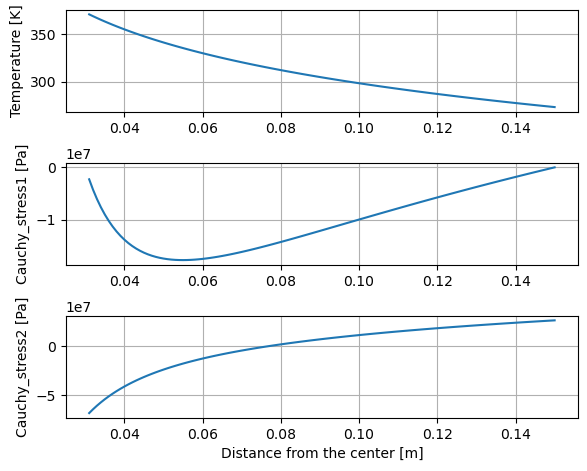

In [10]:
 fig,ax = plt.subplots(nrows = 3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.95, wspace=0.1, hspace=0.5)
ax[0].plot(x_array, temperature)
ax[0].set_ylabel(u'Temperature [K]')
ax[1].plot(x_array, stress1)
ax[1].set_ylabel(u'Cauchy_stress1 [Pa]')  # _radial 
ax[2].plot(x_array, stress2)
ax[2].set_xlabel(u'Distance from the center [m]')
ax[2].set_ylabel(u'Cauchy_stress2 [Pa]') # _tangential
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)
plt.show()